# Vehicle register visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport

sns.set_theme()
plt.rcParams['figure.figsize'] = (10, 6)
pd.options.display.max_columns = 50
pd.options.display.max_rows = 20

%matplotlib inline

data_path = './data/nosync/'

## Load raw data

In [2]:
dtype = {
    # 1: 'float', #
    # 20: 'float', # Motor otacky
    # 21: 'float', # Motor objem
    # # 25: 'float', # Mista
    # # 26: 'float', # Mista
    # # 27: 'float', # Mista
    # # 28: 'float', # Mista
    # 30: 'float', # Max. zatizeni strechy
    # 31: 'float', # Objem cisterny
    # # 32: 'float', # Rozvor
    # 33: 'float', # Rozchod
    # 34: 'float', # Rozchod
    # 35: 'float', # Rozchod
    # 36: 'float', # Rozchod
    # 37: 'float', # Delka
    # 38: 'float', # Sirka
    # 39: 'float', # Vyska
    # 40: 'float', # Loz. plocha
    # 41: 'float', # Loz. plocha
    # 42: 'float', # Hmotnost prov.
    # 43: 'float', # Hmotnost max.
    # 44: 'float', # Hmotnost prip.
    # 45: 'float', # Hmotnost povol.
    # 46: 'float', # Hmotnost prip. N1
    # 47: 'float', # Hmotnost prip. N2
    # 48: 'float', # Hmotnost prip. N3
    # 49: 'float', # Hmotnost prip. N4
    # 50: 'float', # Hmotnost povol. N1
    # 51: 'float', # Hmotnost povol. N2
    # 52: 'float', # Hmotnost povol. N3
    # 53: 'float', # Hmotnost povol. N4
    # 54: 'float', # JS prip.
    # 55: 'float', # JS povol.
    # 57: 'float', # Spoj. SZ
    # 58: 'float', # Spoj. SZ
    # 59: 'float', # Spoj. SZ
    # 60: 'float', # Spoj. SZ
    # 62: 'float', # Napravy
    # 71: 'float', # Max. rychlost
}


# mapStav = {
#     'PROVOZOVANÉ': 0,
#     'VYŘAZENO Z PROVOZU': 1,
#     'ZÁNIK': 2,
# }
# converters = {
#     # Stav
#     3: lambda x: mapStav.get(x, np.nan),
# }

cols = [
    'Rok výroby',
    'Stav',
    '1. registrace',
    '1. registrace ČR',
    'Druh',
    'Druh 2. ř.',
    'Kategorie',
    'Tovární značka',
    'Obchodní označení',
    'Motor/Max. výkon',
    'Motor/Zdvihový objem',
    'Palivo',
    'Míst celkem',
    'Barva',
    'Délka',
    'Šířka',
    'Provozní hmotnost',
    'Spojovací zařízení (SZ)',
    'Nápravy počet',
    'Max. rychlost',
    'Spotřeba průměrná',
    'Emise CO2',
    'Prohlídka status',
]

data = pd.read_csv('./data/nosync/registr_silnicnich_vozidel_2023-02-24.csv', usecols=cols, sep='|', dtype=dtype, true_values=['True'], false_values=['False'], na_values='NEUVEDENO', parse_dates=[4, 5], dayfirst=True, thousands=' ', decimal=',', encoding='cp1250', encoding_errors='ignore')

/tmp/ipykernel_6908/3184429321.py:80: DtypeWarning: Columns (9,10,13,22,25,56) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/nosync/registr_silnicnich_vozidel_2023-02-24.csv', usecols=cols, sep='|', dtype=dtype, true_values=['True'], false_values=['False'], na_values='NEUVEDENO', parse_dates=[4, 5], dayfirst=True, thousands=' ', decimal=',', encoding='cp1250', encoding_errors='ignore')
/tmp/ipykernel_6908/3184429321.py:80: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('./data/nosync/registr_silnicnich_vozidel_2023-02-24.csv', usecols=cols, sep='|', dtype=dtype, true_values=['True'], false_values=['False'], na_values='NEUVEDENO', parse_dates=[4, 5], dayfirst=True, thousands=' ', decimal=',', encoding='cp1250', encoding_errors='ignore')
/tmp/ipykernel_6908/3184429321.py:80: U

## Ydata profiling

In [6]:
data.describe()

,Rok výroby,Motor/Max. výkon,Motor/Zdvihový objem,Délka,Šířka,Provozní hmotnost,Nápravy počet,Max. rychlost,Spotřeba průměrná,Emise CO2
count,1.223190e+07,1.681205e+07,1.680793e+07,1.727268e+07,1.727338e+07,1.744419e+07,1.721380e+07,1.727774e+07,1.572487e+07,4.121228e+06
mean,2.006120e+03,5.663519e+01,1.709797e+03,5.134804e+03,1.350286e+03,5.506805e+04,1.982316e+00,1.191047e+02,3.018632e+00,2.494341e+04
std,2.199061e+04,2.738168e+03,2.074170e+03,1.114958e+06,4.198775e+04,1.068362e+07,2.554940e+01,7.709258e+02,4.347047e+00,2.344407e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.175000e+04,-1.696000e+03,-2.530000e+05,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.980000e+03,0.000000e+00,1.046000e+03,0.000000e+00,0.000000e+00,8.700000e+02,2.000000e+00,1.200000e+01,0.000000e+00,1.200000e+02
50%,1.993000e+03,5.000000e+01,1.390000e+03,4.110000e+03,1.646000e+03,1.136000e+03,2.000000e+00,1.500000e+02,4.100000e+00,1.400000e+02
75%,2.002000e+03,8.100000e+01,1.896000e+03,4.500000e+03,1.790000e+03,1.490000e+03,2.000000e+00,1.830000e+02,5.400000e+00,1.620000e+02
max,2.901202e+07,7.325500e+06,9.920000e+05,1.400013e+09,2.550350e+07,2.147484e+09,2.222200e+04,1.711040e+06,4.125000e+03,1.278119e+09


In [5]:
profile = ProfileReport(data, title=f'Registr vozidel - 2023-02-24', minimal=True)
profile.to_file('data/exploratory_analysis/vehicle_register_2023-02-24.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 1157.69it/s]


In [6]:
register_cols = [
    'VIN',
    'Type',
    'SecondaryType',
    'Category',
    'Make',
    'Model',
    'ManufactureYear',
    # 'FirstRegistration',
    'MotorPower',
    'MotorVolume',
    'DriveType',
    'Places',
    'Length',
    'Width',
    'Height',
    'OperatingWeight',
    'PermissibleWeight',
    'MaxSpeed',
    'AverageConsumption',
    'CityConsumption',
    'OutOfCityConsumption',
    'Emissions',
    'CityEmissions',
    'OutOfCityEmissions',
]

register_dtypes = {
    'VIN': 'str',
    'Type': 'category',
    'SecondaryType': 'category',
    'Category': 'category',
    'Make': 'category',
    'Model': 'category',
    'ManufactureYear': 'float16',
    # 'FirstRegistration': '',
    'MotorPower': 'float16',
    'MotorVolume': 'float16',
    'DriveType': 'category',
    'Places': 'float16',
    'Length': 'float16',
    'Width': 'float16',
    'Height': 'float16',
    'OperatingWeight': 'float16',
    'PermissibleWeight': 'float16',
    'MaxSpeed': 'float16',
    'AverageConsumption': 'float16',
    'CityConsumption': 'float16',
    'OutOfCityConsumption': 'float16',
    'Emissions': 'float16',
    'CityEmissions': 'float16',
    'OutOfCityEmissions': 'float16',
}

df_register = pd.read_csv(
    f'{data_path}registr_silnicnich_vozidel_2023-02-24.analysis-cleaned-2023-05-14.csv',
    usecols=register_cols,
    dtype=register_dtypes,
    # parse_dates=['FirstRegistration'],
    true_values=['True'],
    false_values=['False'],
    encoding_errors='ignore')

profile = ProfileReport(df_register, title=f'Registr vozidel - 2023-02-24 - vyčištěný pro analýzu', minimal=True)
profile.to_file('./data/exploratory_analysis/vehicle_register_2023-02-24.analysis-cleaned-2023-05-14.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]/home/gemsee/.local/lib/python3.10/site-packages/numpy/core/_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
Summarize dataset:   0%|          | 0/28 [00:04<?, ?it/s, Describe variable:Category]/home/gemsee/.local/lib/python3.10/site-packages/numpy/core/_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
Summarize dataset:   7%|▋         | 2/28 [00:04<01:58,  4.56s/it, Describe variable:Type]    /home/gemsee/.local/lib/python3.10/site-packages/numpy/core/_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
Summarize dataset:  21%|██▏       | 6/28 [00:07<00:21,  1.05it/s, Describe variable:SecondaryType]/home/gemsee/.local/lib/python3.10/site-packages/numpy/core/_methods.py:213: RuntimeWarning: overf

## Number of observations per year

<Axes: >

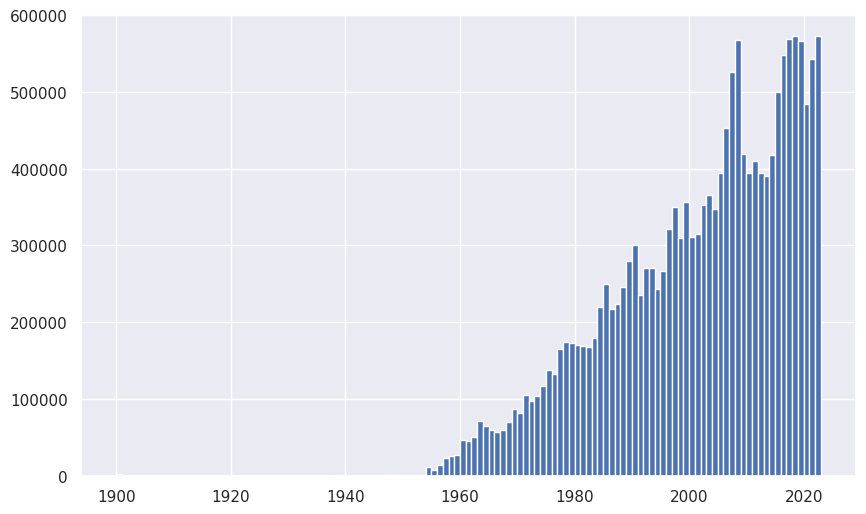

In [6]:
data_missing = data.copy()

data_missing['Year'] = data_missing.apply(lambda row: row['1. registrace ČR'].split(' ')[0].split('.')[2], axis=1).astype(int)
data_missing = data_missing[(data_missing['Year'] >= 1900) & (data_missing['Year'] <= 2023)]
data_missing['Year'].hist(bins=123)

Make sure we didn't exclude any observations by using the FirstRegistrationCZ column

In [7]:
data_missing.isna().sum()

Rok výroby            5257785
Stav                        0
1. registrace            1209
1. registrace ČR            0
Druh                    47859
                       ...   
Max. rychlost          211670
Spotřeba průměrná     1764429
Emise CO2            13362024
Prohlídka status            0
Year                        0
Length: 24, dtype: int64

## Missing values

In [14]:
data_missing[[
    'Rok výroby',
    'Stav',
    '1. registrace',
    '1. registrace ČR',
    'Druh',
    'Druh 2. ř.',
    'Kategorie',
    'Tovární značka',
    'Obchodní označení',
    'Motor/Max. výkon',
    'Motor/Zdvihový objem',
    'Palivo',
    'Míst celkem',
    'Barva',
    'Délka',
    'Šířka',
    'Provozní hmotnost',
    'Spojovací zařízení (SZ)',
    'Nápravy počet',
    'Max. rychlost',
    'Spotřeba průměrná',
    'Emise CO2',
    'Prohlídka status',
]] = \
        data_missing[[
            'Rok výroby',
            'Stav',
            '1. registrace',
            '1. registrace ČR',
            'Druh',
            'Druh 2. ř.',
            'Kategorie',
            'Tovární značka',
            'Obchodní označení',
            'Motor/Max. výkon',
            'Motor/Zdvihový objem',
            'Palivo',
            'Míst celkem',
            'Barva',
            'Délka',
            'Šířka',
            'Provozní hmotnost',
            'Spojovací zařízení (SZ)',
            'Nápravy počet',
            'Max. rychlost',
            'Spotřeba průměrná',
            'Emise CO2',
            'Prohlídka status',
        ]].isna().astype(int)

plt.rcParams['figure.figsize'] = (10, 8)
grs = data_missing.groupby(['Year']).sum()

<Axes: xlabel='Year'>

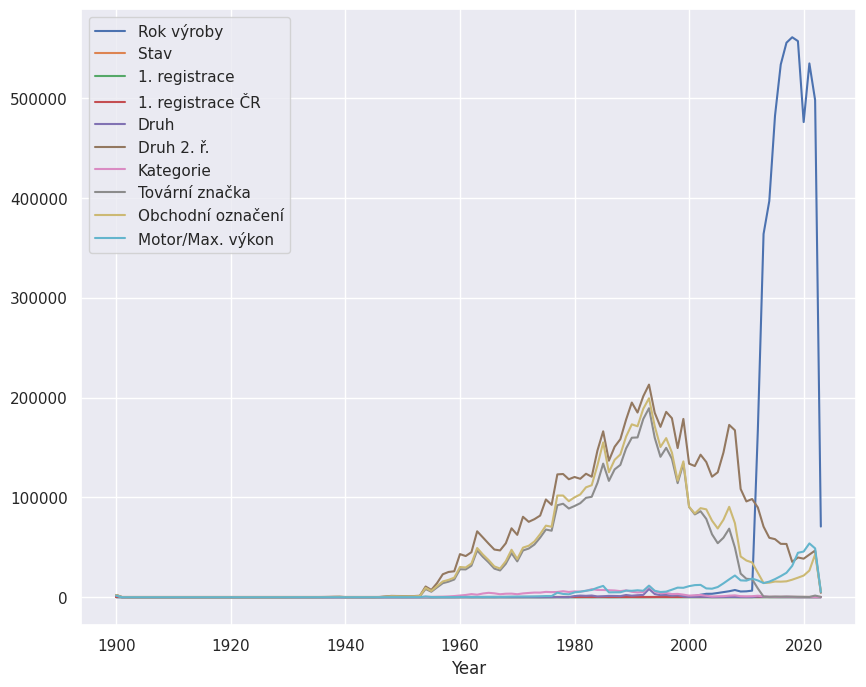

In [15]:
grs.plot(y=[
    'Rok výroby',
    'Stav',
    '1. registrace',
    '1. registrace ČR',
    'Druh',
    'Druh 2. ř.',
    'Kategorie',
    'Tovární značka',
    'Obchodní označení',
    'Motor/Max. výkon',
])

<Axes: xlabel='Year'>

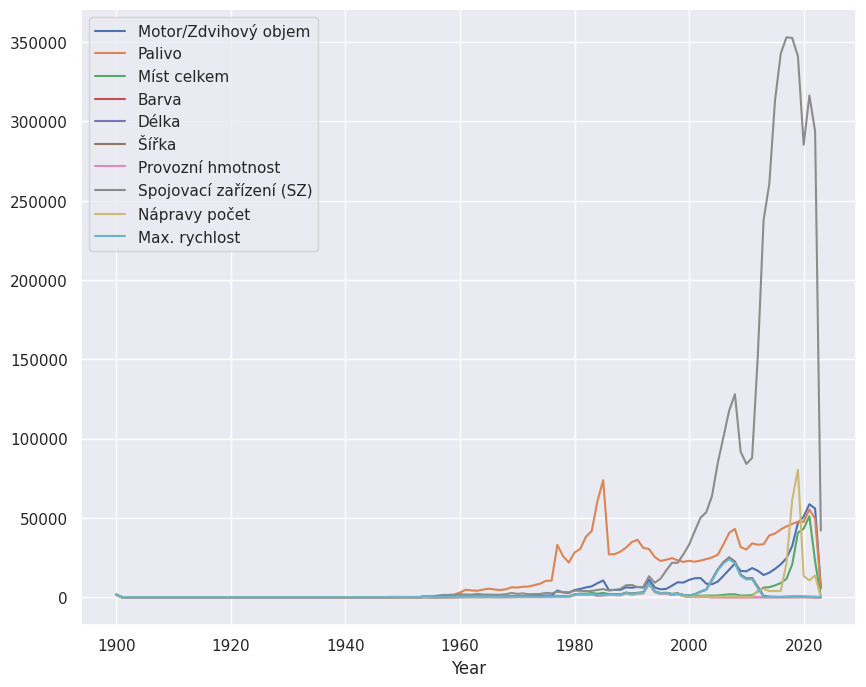

In [16]:
grs.plot(y=[
    'Motor/Zdvihový objem',
    'Palivo',
    'Míst celkem',
    'Barva',
    'Délka',
    'Šířka',
    'Provozní hmotnost',
    'Spojovací zařízení (SZ)',
    'Nápravy počet',
    'Max. rychlost',
])

<Axes: xlabel='Year'>

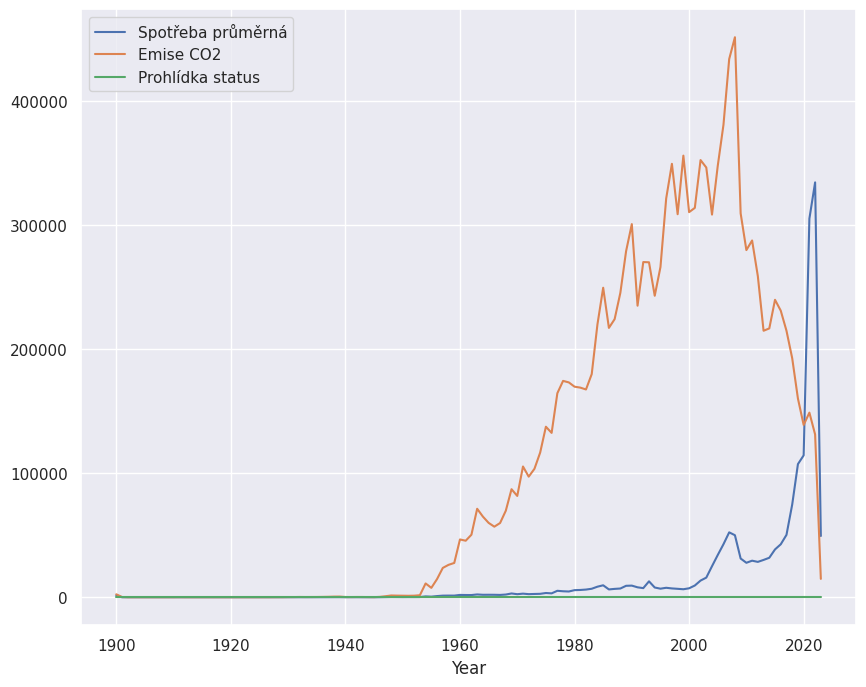

In [17]:
grs.plot(y=[
    'Spotřeba průměrná',
    'Emise CO2',
    'Prohlídka status',
])